## Run import statements 

In [1]:
from keras import models
from keras import layers
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


# 1.1 Data Preparation 
## 1.1.1 Import and characterize Dataset

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

training_set_length = len(x_train) 
test_set_length = len(x_test)
print("training set length: ", training_set_length) 
print("test set length: ",test_set_length) 
print(y_train)

training set length:  50000
test set length:  10000
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


## 1.1.2 Print first 5 training set images with label

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


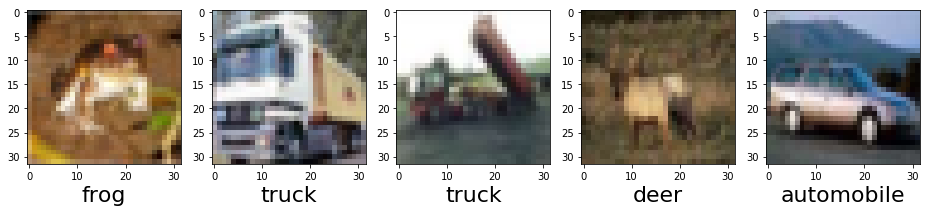

In [3]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = x_train[i]
    axarr[i].imshow(img)
    label = cifar_classes[ y_train[i][0]]
    axarr[i].set_xlabel(label,fontsize=22)
plt.show()

## 1.1.3 Print first 5 of the test set images and labels 

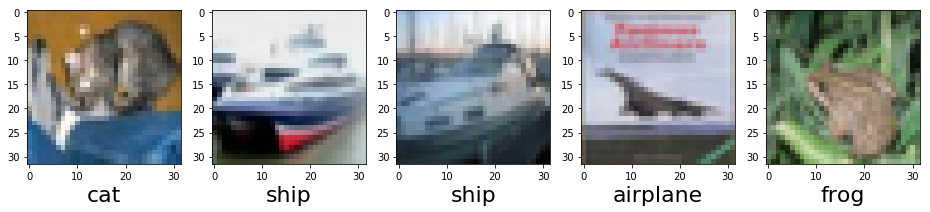

In [4]:
f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = x_test[i]
    axarr[i].imshow(img)
    label = cifar_classes[ y_test[i][0]]
    axarr[i].set_xlabel(label,fontsize=22)
plt.show()

## 1.1.4 Normalize values to be between 0 and 1 

In [40]:
x_train= np.reshape(x_train,(training_set_length,3072))
x_test = np.reshape(x_test,(test_set_length,3072))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# values are RGB values, with max of 255. Just dividing everything by 255. 
x_train /= 255 
x_test /= 255 

# 1.2 Model Selection

## 1.2.1 Building the CNN Model 

In [41]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)              

In [49]:
img = x_test[0].reshape(1,32,32,3)
model.predict(img)
model.evaluate(img,batch_size=1)

IndexError: list index out of range

In [44]:
batch_size = 50
no_epochs = 20
validation_split = .2
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=1,
            validation_split=validation_split)

score = model.evaluate(x_test, y_test, verbose=0)
# print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

ValueError: Error when checking input: expected conv2d_10_input to have 4 dimensions, but got array with shape (50000, 3072)